## LR and QR algorithms for eigenvalue problems

* Theorem of LR and QR algorithms
* Convergence of LR and QR algorithms
* Example of eigenvalue problems



In [1]:
include("math405.jl")

#### LU and QR decompositions

LR and QR algorithms are two of the most important methods for solving the symmetric and unsymmetric eigenvalue problem, where LR algorithm is based on LU decomposition, and QR algorithms is based on QR decomposition. Let's first revisit these two decompositions as they were described in lecture 4: 

**Theorem:** If n ≥ 2, and suppose that $A \in \mathbb{R}^{n \times n}$ is such that
every leading principal submatrix $A^{(k \times k)} \in \mathbb{R}^{k \times k}$of $A$ of order k, with
1 ≤ k<n, is nonsingular, then $A$ has a unique factorization in the form: $$A= LU$$ where $U$ is an upper triangular matrix, and $L$ is a low triangular matrix with all 1’s in the diagonal.

*Proof:* see e.g. Süli & Mayers, §2.3. 

















**Theorem:** If $A \in \mathbb{R}^{m \times n}$ there exist a unique pair of 
* an unitary $m \times n$ matrix $Q$ 
* an upper triangular $n\times n$matrix $R$ with positive diagonal entries 
such that 
$$
    A = QR
$$
Specifically , if n ≥ 3 and $A \in \mathbb{R}^{m \times n}$ is a symmetric tridiagonal matrix, $Q$ is a orthogonal matrix.

*Proof: * see e.g. Süli & Mayers, §2.9, §5.7.

### How these algorithms work

Rutishauser developed LR algorithm in 1958, suppose we have matrix $A$ with LU decompsition $A=LR$, where $L$ is the lower triangular matrix, and $R$ is the upper triangular matrix, starting from $A^{(0)} = A$, if moduli of the eigenvalues of $A$ are distinct,under certain conditions, the following iteration
$$A^{(s)} = L^{(s)} R^{(s)}, \\ A^{(s+1)} = R^{(s)} L^{(s)} = L^{(s+1)}R^{(s+1)}$$
will converge to an upper triangular matrix $R$ which diagonal elements converge to the eigenvalue of $A$ ,
$$lim_{s \to \infty}A^{(s)} = R \\diag{R} = diag(\lambda_1, \cdots, \lambda_n ) $$


Similarily, Francis & Kublanovskaya developed QR algorithm in 1961, starting from $A^{(0)}$, using QR decompsition, 
$$A^{(k)} = Q^{(k)} R^{(k)}, \\ A^{(k+1)} = R^{(k)} Q^{(k)} = Q^{(k+1)}R^{(k+1)}$$
here it's obvious that $$ R^{(k)} = [Q^{(k)}]^T A^{(k)} \\ \therefore A^{(k+1)} = [Q^{(k)}]^T A^{(k)} Q^{(k)}$$

under certain conditions, when $k \to \infty$, $$\\diag{A^{(k)}} = diag(\lambda_1, \cdots, \lambda_n ),$$ also, the corresponding eigenvectors will the columns of $\prod_{k=1}^{n} Q_k$.

The proof of convergence will be presented in the next part, let's first see some examples,

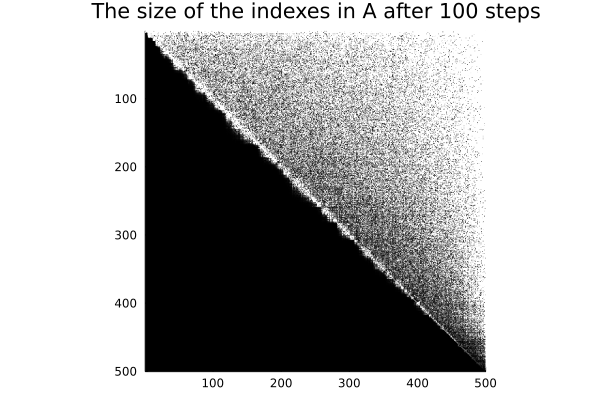

In [96]:
n=500
eigvals1 = 10*randn(n)
D = Diagonal(eigvals1); 
S=rand(n,n)
A = S*D/S
steps=100
for k = 1:steps
    Q,R = qr(A)
    A = R*Q
end 
plot(Gray.(abs.(A)), title= "The size of the indexes in A after $steps steps")

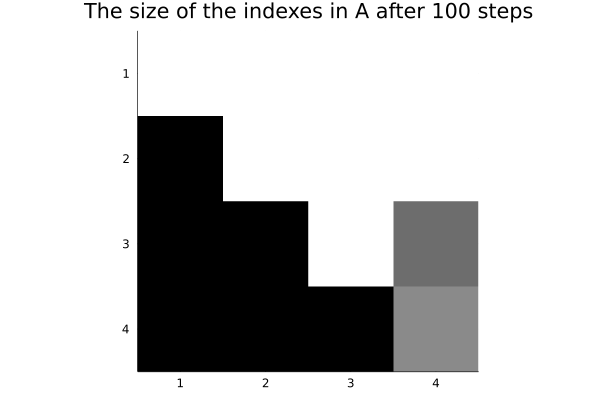

In [100]:
Random.seed!(10);
n = 4
steps = 100
eigvals1 = 10*randn(n)
D = Diagonal(eigvals1); 
S=rand(n,n)
A = S*D/S
A2 = copy(A)
Atotal = zeros(n,n,steps)
Error = zeros((n,steps))
for k = 1:steps
    Q,R = qr(A)
    A = R*Q
    EiA = diag(A)
    Atotal[:,:,k] = A
end 
permvec = sortperm(diag(A))
plot(Gray.(abs.(A)),title= "The size of the indexes in A after $steps steps")


#### Convergence of the lower triangular values
The values under the diagonal in the matrix A should converge lineary towards 0, such that  $|a_{ij}^k|=O\left(\left|\frac{\lambda_i}{\lambda_j}\right|^k\right)$ when $i>j$.

$$
\frac{A_{100}}{A_{99}}=
\left[\begin{array}{cccc} 
1 & 1 & 1 & -1 \\
0.7235 & 1 & 1 & -1 \\
-0.4837 & -0.6686 & 1 & -1\\
0.1147 & 0.1586 & -0.2372 & 1
\end{array}\right]
$$

$$
\lambda = \left[\begin{array}{cccc}
 4.7140 & 3.4106 & -2.2804 & -0.5480
\end{array}\right]
$$

$$
\frac{\lambda_2}{\lambda_1}=\frac{3.4106}{4.7140}=0.7235\\
\frac{\lambda_3}{\lambda_1}=\frac{-2.2804}{4.7140}=-0.4837\\
\frac{\lambda_4}{\lambda_1}=\frac{-0.5480}{4.7140}=-0.1147\\
$$


#### Adding a shift to QR algorithms

In order to make our algorithm converge faster, we could add a shift to the original algorithm, for QR algorithm, we have the following iteration:
$$A^{(k)}-\mu^{(k)} I= Q^{(k)} R^{(k)} , \\ A^{(k+1)} = R^{(k)} Q^{(k)} +\mu^{(k)} I$$

Here the choice of shift parameter $\mu^{k}$ is:
$\mu^{k} = \text{max } diag(A^{(k)})$ ,
which is the largest diagonal element of the matrix $A^{(k)}$.


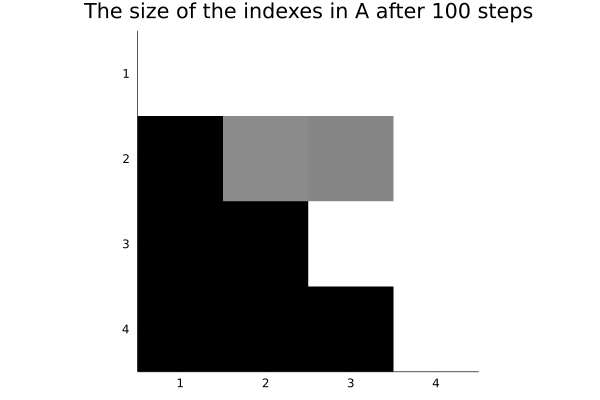

In [107]:
Random.seed!(10);
n = 4
steps = 100
eigvals1 = 10*randn(n)
D = Diagonal(eigvals1); 
S=rand(n,n)
A = S*D/S
A2 = copy(A)
Error = zeros((n,steps))
ei = eigvals(A) 
Atotal = zeros(n,n,steps)
for k = 1:steps
    val = findmax(diag(A))[2]
    Q,R = qr(A-A[val,val]*I)
    A = R*Q+A[val,val]*I
    Atotal[:,:,k] = A
end
plot(Gray.(abs.(A)), title= "The size of the indexes in A after $steps steps")


#### Convergence of the lower triangular values for QR with switch

$$
\frac{A_{100}}{A_{99}}=
\left[\begin{array}{cccc} 
1 & 0.7512 & -1 & -1 \\
0.7513 & 1 & -1 & -1 \\
-0.1864 & -0.2481 & 1 & -1\\
NaN & NaN & NaN & 1
\end{array}\right]
$$

$$
\lambda = \left[\begin{array}{cccc}
 -2.2804 & -0.5480 & 3.4106 & 4.7140
\end{array}\right]
$$



#### Comparing the two algorithms

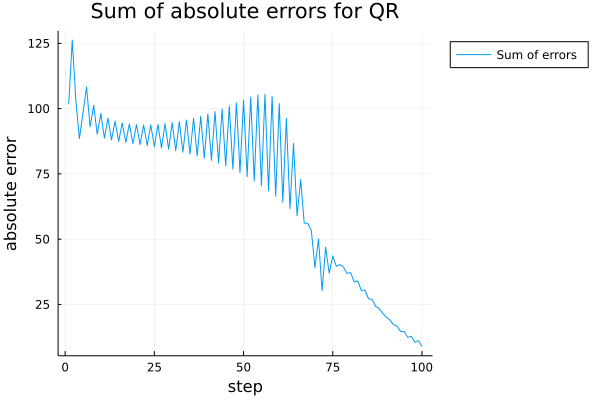

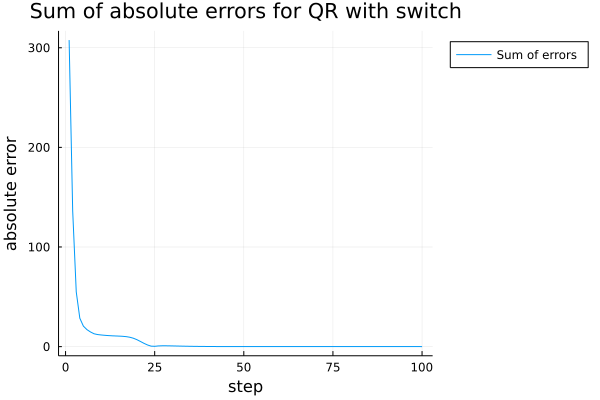

In [108]:
Random.seed!(10);
n = 10
steps = 100
eigvals1 = 10*randn(n)
Q, _ = qr(randn(n, n)); 
D = Diagonal(eigvals1); 
S=rand(n,n)
A2 = Q*D*Q'
A2 = S*D/S
A = copy(A2)
for k = 1:steps
    Q,R = qr(A)
    A = R*Q
end 
permvec = sortperm(diag(A))
A = copy(A2)
Ei = eigvals(A)
Error = zeros((n,steps))
for k = 1:steps
    Q,R = qr(A)
    A = R*Q
    EiA = diag(A)
    Error[:,k] = abs.(EiA[permvec]-Ei)
end 
Err = sum(Error,dims=1)

A = copy(A2)
for k = 1:steps
    val = findmax(diag(A))[2]
    Q,R = qr(A-A[val,val]*I)
    A = R*Q+A[val,val]*I
end 
permvec = sortperm(diag(A))
A = copy(A2)
Ei = eigvals(A) 
Error1 = zeros((n,steps))
for k = 1:steps
    val = findmax(diag(A))[2]
    Q,R = qr(A-A[val,val]*I)
    A = R*Q+A[val,val]*I
    EiA = diag(A)
    Error1[:,k] = abs.(EiA[permvec]-Ei)
end 

Err1 = sum(Error1,dims=1)
K = 1:steps
display(plot(K,Transpose(Err),xlabel = "step",ylabel ="absolute error",title = "Sum of absolute errors for QR",label = "Sum of errors",legend = :outertopright))
display(plot(K,Transpose(Err1),xlabel = "step",ylabel ="absolute error",title = "Sum of absolute errors for QR with switch",label = "Sum of errors",legend = :outertopright))



#### Study of the convergence
Let's prove the convergence of QR algorithm. 

Let $A = QR$, A be an n x n symmatric positive definite martix with distinct eigenvalues form $\lambda_1$ to $\lambda_n$.

First,assume that the eigenvalues of A satisfy

$$|\lambda_1|>|\lambda_2|>...>|\lambda_n|$$

$$A_1^s = Xdiag(\lambda_i^s)X^{-1} = XD^sY$$

We can define matrices, Q,R,L,U by the relations X = QR, Y = LU.Then, plug in the values of X and Y. We have:

$$A_1^s = QRD^sLU$$
$$A_1^s = QRD^sL*I*U$$
$$A_1^s = QR(D^sLD^{-s})D^sU$$

Where $ (D^sLD^{-s})$ is a unit lower triangular matirx. Its $(i,j)$ element is given by $l_{ij}(\lambda_i/\lambda_j)^s$ when $i > j$.Hence, we can write 
$ (D^sLD^{-s}) = I + E_s $ where $ E_s \to 0 $ as $s \to \infty $

And since $A_1^s = QR(D^sLD^{-s})D^sU$, we can get
$$A_1^s = QR(I + E_s)D^sU$$
$$A_1^s = Q(I+RE_sR^{-1})RD^sU$$
So,$A_1^s = Q(I+F_3)RD^sU$, where $ F_s \to 0 "$ as $s \to \infty$

Now,$(I+F_3)$ may be factorized into the product of a unitary matirx $\tilde Q_s$, and an upper-triangular matrix $ \tilde R_s $ with $ F_s \to 0$, $\tilde Q_s$ and $ \tilde R_s$ are both tend to I. So,then we get:

$$A_1^s = (Q\tilde Q_s)(\tilde R_sRD^sU)$$

Hence $P_s$, converges essentially to Q. If we insist that all $R_s$, have positive diagonal elements we on find the unitary diagonal faotor from $A_1^s = (Q\tilde Q_s)(\tilde R_sRD^sU)$
Writing $D = |D|D_1$ and $U = D_2(D_2^{-1}U)$
where $D_1$, and $D_2$, are unitary diagonal matrioes and $ D_2^{-1}U$ has positive diagonal elements ($ \tilde R_s$, and $R$ already have positive diagonal elements), then we can get:

$$A_1^s = Q \tilde Q_s D_2 D_1^s [(D_2 D_1^s)^{-1} \tilde R_sR(D_2D_1^s)|D|^s(D_2^{-1}U)]$$

The matrix in braces is upper-triangular with positive diagonal elements and hence $P_S $ ~ $Q D_2 D_1^s $, showing that ultimately $Q_s$, becomes $D_1$




#### There are two ways to improve the theorem above and the reader may like to try them:

1.Keep the assumption that  Q^T=LU exists, but remove the assumption that  U has nonnegative diagonal entries.

2.Remove the assumption that  A is positive definite, but keep the assumption that every eigenvalue is distinct.

#### Prove the convergence of LR algorithm

 https://djvu.online/file/X75oFFC5CY5w9
 
 There is a link for fomal proof of the convergence of LR algorithm


#### Example of eigenvalue problems

Let's first consider a simple ODE eigenvalue problem: the time-independent Schrödinger equation:
$$-\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} +V\psi = E\psi$$
V satisfies infinite well:
$$V = 0, 0\leq x \leq a \\ V = \infty, otherwise$$

Bt using Fourier's series we know solution of this equation is a linear combination of stationary states:
$$\psi_n(x) = \sqrt{\frac{2}{a}}sin(\frac{n\pi x}{a}) \\  \Psi(x,0) = \sum_{n=1}^{\infty} c_n \psi_n(x)$$
where $c_n = \sqrt{\frac{2}{a}} \int_{0}^{a} sin(\frac{n\pi x}{a})\Psi(x,0)dx$  

We can obtain allowed eigen energies corresponding to $\psi_n$ numerically by turning Schrödinger equation into a matrix eigenvalue problem, let $\hbar = 1$, step size $= h$, here for simplicity we ignore the $\frac{h^2 f_n''''}{12}$ term in Cowling’s method
$$ \frac{d^2 f_{n}}{dx^2} = \frac{f_n - 2f_n + f_{n-1}}{h^2} - \frac{h^2 f_n''''}{12}+O(h^4) $$

For SE we have:

$$\frac{d^2 \psi}{dx^2} = \frac{\psi_{j+1} - 2\psi_{j} + \psi_{j-1}}{h^2}$$
Then we have :
$$ -\lambda  \psi_{j+1} +(2\lambda +V_j)\psi_j -\lambda \psi_{j-1} = E\psi$$
here $ \lambda = \frac{1}{2mh^2}$, write in operator form, 
$$\hat{H}\Psi = E\Psi$$
Let $v_j = \frac{V_j}{\lambda}$the Hamiltonian $\hat{H}$ can be written as:
$$\hat{H} = \lambda \begin{bmatrix}
    \ddots &  &  &  & & & & \\
     &-1 &2+v_{j-1}& -1&0&0&\\
      &0 &-1& 2+v_j&-1&0&\\
     &0 & 0 & -1&2+v_{j+1}&-1& \\
    &&&&&& \ddots
\end{bmatrix} \\ \Psi = \begin{bmatrix} \vdots \\ \psi_{j-1}\\ \psi_{j}\\ \psi_{j+1}\\ \vdots \end{bmatrix}$$


Now we can apply this model to the infinite square well with dirichlet BC, where $V = 0$, for a $100 \times 100 \hat{H}$, using QR algorithm, we can have the following result,

In [7]:
#define H
H= zeros(Float64,100,100)
X = H
for i = 1:100
    H[i,i] = 2.0
    if i+1 <= 100
        H[i,i+1] = -1.0
    end
    if i-1 > 0
        H[i,i-1] = -1.0
    end
end
#QR algorithm
for k = 1:100
    Q,R = qr(H)
    H = R*Q
end 
#add the constant 101^2/pi^2
H = 10201/pi^2 * H
Diagonal(H)


100×100 Diagonal{Float64, Vector{Float64}}:
 4103.76      ⋅        ⋅        ⋅    …    ⋅       ⋅        ⋅        ⋅ 
     ⋅    4064.02      ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅    4025.44      ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅    3987.96       ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅    …    ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅    …    ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
     ⋅        ⋅        ⋅        ⋅         ⋅       ⋅        ⋅        ⋅ 
    ⋮                            

From the lowest 4 energies, the above matrix is consistent with the exact eigen energy
$$E = \frac{\hbar^2 k^2}{2m},$$ where $k = \frac{n \pi}{a}, n = 1,2,3,4 \dots$, also plot of the eigenvector is shown below, this is consistent with the stationary states of the infinite well, by simply add V(x) into the above $\hat{H}$, this toy model can solve SE for other conditions.

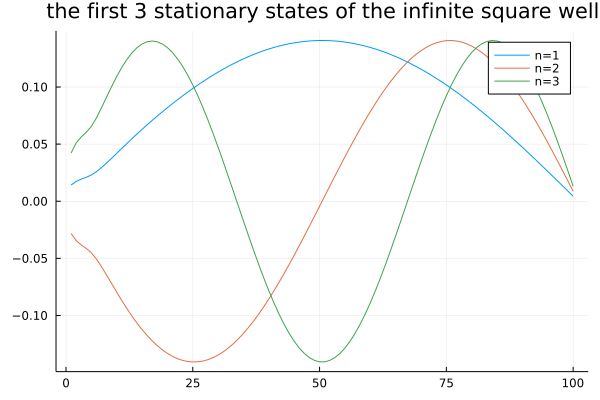

In [8]:
pQ = I
X1 = copy(X)
for i = 1:1000
  Q,R = qr(X1)
  Q1 = qr(X1).Q
  pQ = pQ*Q1
  X1 = R*Q
end
plot(pQ[1,:],label = "n=1",title = "the first 3 stationary states of the infinite square well" )
plot!(pQ[2,:],label = "n=2")
plot!(pQ[3,:],label = "n=3")


#### What about PDE?

Now let's think about the Laplacian eigenvalue problem with Dirichlet BC, we can apply the similar method to following 2D Laplace equation
$$-\frac{\partial^2u(x,y)}{\partial x^2} - \frac{\partial^2u(x,y)}{\partial y^2} = \lambda u(x,y)$$
in fact, for $0 \leq x,y \leq 1$we know the eigenvalue $\lambda$ satifies $\lambda = \pi^2(\lambda_x^2+\lambda_y^2)$, here using 2nd central difference
$$\lambda u_{i,j} = \frac{4u_{i,j} - u_{i+1,j} - u_{i-1,j} - u_{i,j+1} - u_{i,j-1}}{h^2}$$
write $$A\boldsymbol{u} = \lambda \boldsymbol{u}$$ we have 
$$A =    \begin{bmatrix}
   T & -I & & \\ -I & T & -I & &\\& \ddots& \ddots& \ddots&  \\ && - I & T & -I \\ &&&-I &T
\end{bmatrix} 
,T =    \begin{bmatrix}
   4 & -1 & & \\ -1 & 4 & -1 & &\\& \ddots& \ddots& \ddots&  \\ && - 1 & 4 & -1 \\ &&&-1 &4
\end{bmatrix}
$$

In [9]:
n = 11
A= zeros(Float64,100,100)
for i = 1:100
    A[i,i] = 4.0
    if i+1 <= 100 && i%10 != 0
        A[i,i+1] = -1.0
        A[i+1,i] = -1.0
    end
    if i<91
        A[i+10,i] = -1.
        A[i,i+10] = -1.
    end
end
pQ = I
for k = 1:1000
    val = findmax(diag(A))[2]
    Q1 = qr(A).Q
    Q,R = qr(A-A[val,val]*I)
    pQ = pQ*Q1
    A = R*Q+A[val,val]*I
end 
Diagonal(A*n^2)

100×100 Diagonal{Float64, Vector{Float64}}:
 19.6054    ⋅        ⋅        ⋅      …     ⋅        ⋅        ⋅        ⋅ 
   ⋅      48.2193    ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅      48.2193    ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅      93.3264        ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅      …     ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅      …     ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅            ⋅        ⋅        ⋅        ⋅ 
  ⋮    

#### Can one hear the shape of a drum?

The above eigenvalue calculated using QR algorithm is exactly the eigenvalue of our 2D Laplace equation $(1+1)\pi,(1+2^2)\pi...$. In our Laplace eigenvalue problem, region determines eigenvalues, but if we know eigenvalue, can we determine the region? Let's see an example Carolyn Gordon and David Webb gives in 1996.

In [10]:
drum1 = 
[  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0   56    0    0    0    0    0    0
  0    0    0    0    0    0    0    0   48   55    0    0    0    0    0    0
  0    0    0    0    0    0    0   41   47   54    0    0    0    0    0    0
  0    0    0    0    0    0   35   40   46   53    0    0    0    0    0    0
  0    0    0    0    0   30   34   39   45   52   60   63   65   66    0    0
  0    0    0    0   26   29   33   38   44   51   59   62   64    0    0    0
  0    0    0   18   25   28   32   37   43   50   58   61    0    0    0    0
  0    0   11   17   24   27   31   36   42   49   57    0    0    0    0    0
  0    5   10   16   23    0    0    0    0    0    0    0    0    0    0    0
  0    4    9   15   22    0    0    0    0    0    0    0    0    0    0    0
  0    3    8   14   21    0    0    0    0    0    0    0    0    0    0    0
  0    2    7   13   20    0    0    0    0    0    0    0    0    0    0    0
  0    1    6   12   19    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 ]

drum2 = 
[0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0   57    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0   56   62    0    0    0
  0    0    0    0    0    0    0    0    0    0    0   55   61   65    0    0
  0    0    0    0    0    0    0    0    0    0    0   54   60   64   66    0
  0    5   11   18   26   30   34   38   42   46   50   53   59   63    0    0
  0    4   10   17   25   29   33   37   41   45   49   52   58    0    0    0
  0    3    9   16   24   28   32   36   40   44   48   51    0    0    0    0
  0    2    8   15   23   27   31   35   39   43   47    0    0    0    0    0
  0    1    7   14   22    0    0    0    0    0    0    0    0    0    0    0
  0    0    6   13   21    0    0    0    0    0    0    0    0    0    0    0
  0    0    0   12   20    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0   19    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


T1 = [4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	-1	4	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
-1	0	0	0	0	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	-1	0	0	0	0	0	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	4	-1	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	-1	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	-1	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	0	0	-1	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	4	-1	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	-1	-1	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	0	-1	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	4	-1	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	-1	4	-1
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4]
T2 = [4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	-1	4	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	-1	0	0	0	0	-1	4	-1	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	-1	0	0	0	0	-1	4	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	-1	4	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0	0	-1	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	4	-1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	-1	0	0	0	0	-1	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	4	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	0	4	-1	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	-1	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	-1	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	-1	0	0	-1	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	0	-1	4	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	0	4	-1	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	-1	-1
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	0	-1	4	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	-1	0	4]
for k = 1:1000
    val = findmax(diag(T1))[2]

    Q1,R1 = qr(T1-T1[val,val]*I)
    T1 = R1*Q1+T1[val,val]*I
end 
for k = 1:1000
    val = findmax(diag(T2))[2]
    Q2,R2 = qr(T2-T2[val,val]*I)
    T2 = R2*Q2+T2[val,val]*I
end 
Diagonal(T2)-Diagonal(T1)

66×66 Diagonal{Float64, Vector{Float64}}:
 -6.12843e-14   ⋅             ⋅          …    ⋅          ⋅         ⋅ 
   ⋅           8.17124e-14    ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅           -1.5099e-14       ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅          …    ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅          …    ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
   ⋅            ⋅             ⋅               ⋅          ⋅         ⋅ 
  ⋮                                      ⋱      

##### Reference
Süli, E., & Mayers, D. (2003). An Introduction to Numerical Analysis. Cambridge: Cambridge University Press. 

J. H. Wilkinson.(1965) Convergence of the LR, QR, and Related Algorithms. The Computer Journal. 8-1: 77–84.

Mary, C, T & Tam,T. (2015). Rutishauser’s LR algorithm and Bruhat iteration. Linear and Multilinear Algebra. 63:10, 2061-2070.

Nanda, T. (1985). Differential Equations and the QR Algorithm. SIAM Journal on Numerical Analysis, 22(2), 310–321.

Kac M. Can one hear the shape of a drum?. Amer. Math. Monthly 73 (1966), 1-23.

Gordon,C., Webb,L.,& Wolpert,S. One cannot hear the shape of a drum.Bull. Amer. Math. Soc. (N.S.) 27 (1992) 134-138

Gordon,C and Webb,D .American Scientist Vol. 84, No. 1 (JANUARY-FEBRUARY 1996), pp. 46-55 

Nica M. Eigenvalues and Eigenfunctions of the Laplacian. The Waterloo Mathematics Review

http://pi.math.cornell.edu/~web6140/TopTenAlgorithms/QRalgorithm.html

https://blogs.mathworks.com/cleve/2012/08/06/can-one-hear-the-shape-of-a-drum-part-1-eigenvalues/